In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df1 = pd.read_csv('train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df1.shape

(891, 12)

In [4]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# making a copy of data 

In [6]:
df = df1.copy()

# checking for null values 

In [8]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

Age         177
Cabin       687
Embarked      2
dtype: int64

# percentage of null value

In [10]:
nv_per = nv/df.shape[0]*100
nv_per

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [11]:
# droping null values greater than 40% 

In [12]:
df.drop('Cabin',axis =1 ,inplace = True)

In [13]:
# droping uniuqe variable
df.drop('Name',axis =1 ,inplace = True)

In [14]:
df.drop('PassengerId',axis =1 ,inplace = True)

In [15]:
df.drop('Ticket',axis =1 ,inplace = True)

In [16]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

Age         177
Embarked      2
dtype: int64

In [17]:
# checking age 
print(df['Age'].unique())
print('*'*50)
print(df['Age'].dtypes)
print('*'*50)
print(df['Age'].mode()[0])
print('*'*50)

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
**************************************************
float64
**************************************************
24.0
**************************************************


In [18]:
# checking Embarked Embarked
print(df['Embarked'].unique())
print('*'*50)
print(df['Embarked'].dtypes)
print('*'*50)
print(df['Embarked'].mode()[0])
print('*'*50)
print(df['Embarked'])
print('*'*50)


['S' 'C' 'Q' nan]
**************************************************
object
**************************************************
S
**************************************************
0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object
**************************************************


In [19]:
# treating NUll Values
df['Age'].fillna(df['Age'].mode()[0],inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)

In [20]:
# Null Values Treated 
nv = df.isnull().sum()
nv = nv[nv>0]
nv

Series([], dtype: int64)

In [21]:
# cheacking for duplicates
df.duplicated().sum()

116

In [22]:
# EDA

In [23]:
cat_col = df.dtypes[df.dtypes == 'object'].index
print(cat_col)
num_col = df.dtypes[df.dtypes != 'object'].index
print(num_col)

Index(['Sex', 'Embarked'], dtype='object')
Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [24]:
for i in cat_col:
    print(df[i].nunique())

2
3


In [25]:
# bivariate Description

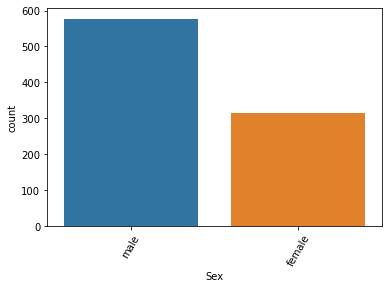

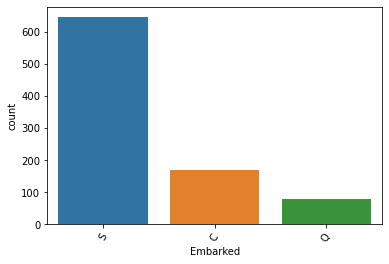

In [26]:
for i in cat_col:
    sns.countplot(x = df[i])
    plt.xticks(rotation = 60)
    plt.show()

In [27]:
# infernce
# S has highiest Embarked
# male passenger are more the female Passenger

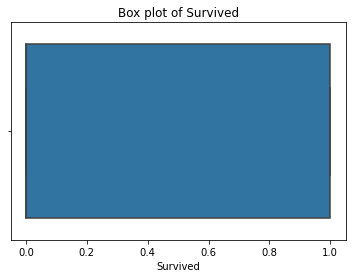

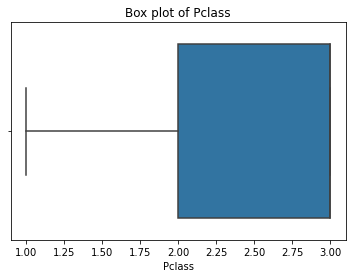

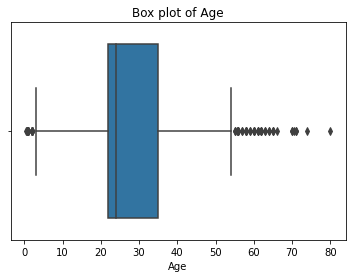

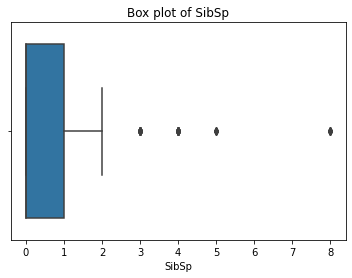

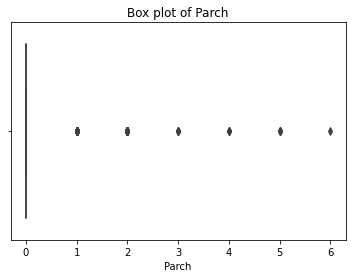

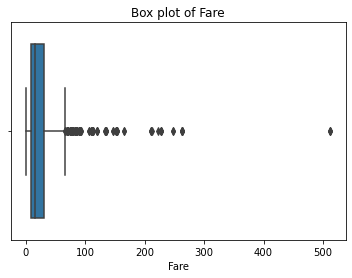

In [28]:
for i in num_col:
    sns.boxplot(x = df[i])
    plt.title(f'Box plot of {i}')
    plt.show()

In [29]:
# infrence
# outlier in AGE,SibSp,Parch,Fare

In [30]:
## Multivariate description

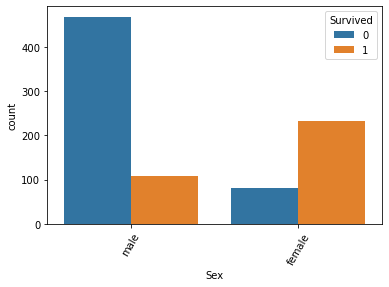

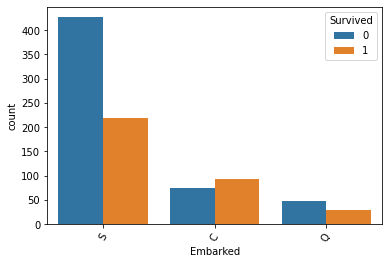

In [31]:
for i in cat_col:
    sns.countplot(x = df[i],hue = df['Survived'])
    plt.xticks(rotation = 60)
    plt.show()

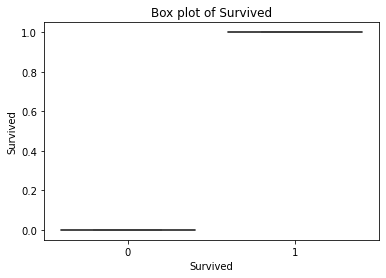

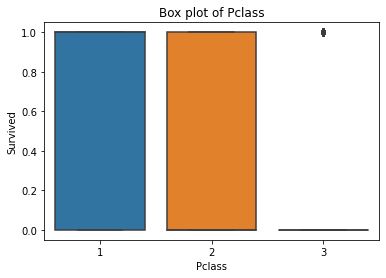

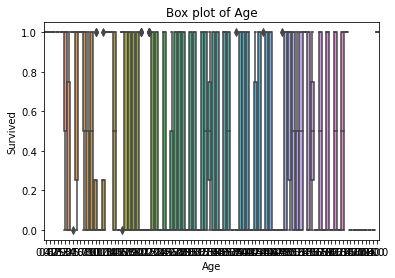

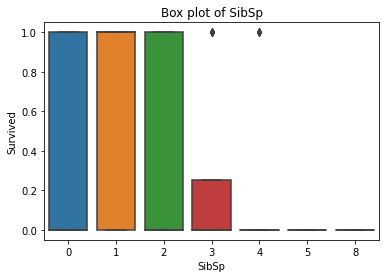

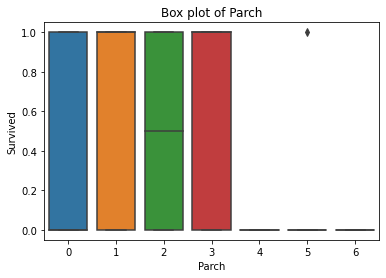

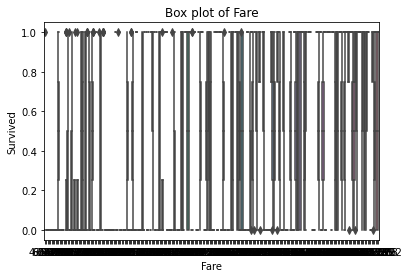

In [32]:
for i in num_col:
    sns.boxplot(x = df[i],y = df['Survived'])
    plt.title(f'Box plot of {i}')
    plt.show()

In [33]:
# Outlier treatment 

In [34]:
df.describe(percentiles=[0.01,0.05,0.07,0.50,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,5%,7%,50%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,max
Survived,891.0,0.383838,0.486592,0.00,0.0,0.000,0.0000,0.0000,1.0000,1.0,1.0000,1.00000,1.0,1.00000,1.00,1.00,1.0000,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,1.0,1.000,1.0000,3.0000,3.0000,3.0,3.0000,3.00000,3.0,3.00000,3.00,3.00,3.0000,3.00000,3.0000
Age,891.0,28.566970,13.199572,0.42,1.0,6.000,10.0000,24.0000,47.0000,48.0,50.0000,51.00000,52.0,54.00000,56.00,59.00,62.0000,65.00000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0,0.000,0.0000,0.0000,1.0000,1.0,2.0000,2.00000,2.0,3.00000,3.00,4.00,4.0000,5.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0,0.000,0.0000,0.0000,2.0000,2.0,2.0000,2.00000,2.0,2.00000,2.00,2.00,2.0000,4.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,0.0,7.225,7.2292,14.4542,77.9583,79.2,82.1708,88.32294,93.5,112.07915,133.99,151.55,211.3375,249.00622,512.3292


In [35]:
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.95))
#     x = x.clip(lower=x.quantile(0.02))
    return x

In [36]:
outlier_cols=['Age','SibSp','Parch','Fare']

In [37]:
df[outlier_cols] = df[outlier_cols].apply(outlier_treatment)

In [38]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
Survived,891.0,0.383838,0.486592,0.00,0.0,0.0000,0.000,0.000,0.0000,1.000000,1.00000,1.00000,1.00000,1.00000
Pclass,891.0,2.308642,0.836071,1.00,1.0,1.0000,1.000,1.000,3.0000,3.000000,3.00000,3.00000,3.00000,3.00000
Age,891.0,28.189865,12.262271,0.42,1.0,2.0000,3.000,6.000,24.0000,54.000000,54.00000,54.00000,54.00000,54.00000
SibSp,891.0,0.452301,0.788059,0.00,0.0,0.0000,0.000,0.000,0.0000,3.000000,3.00000,3.00000,3.00000,3.00000
Parch,891.0,0.345679,0.663266,0.00,0.0,0.0000,0.000,0.000,0.0000,2.000000,2.00000,2.00000,2.00000,2.00000
Fare,891.0,27.720486,29.225083,0.00,0.0,6.3975,6.975,7.225,14.4542,111.481225,112.07915,112.07915,112.07915,112.07915


In [39]:
# checking Target Variable 

In [40]:
print(df['Survived'].dtypes)
print(df['Survived'].unique())
print(df['Survived'].value_counts())


int64
[0 1]
0    549
1    342
Name: Survived, dtype: int64


In [41]:
# target valriable is categorical

In [42]:
# checking Independent varibale

In [43]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
dtype: object

In [44]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [45]:
df['Sex'] = df['Sex'].replace({'male':1,'female':0})

In [46]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [47]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [48]:
df_d = pd.get_dummies(df,columns=['Embarked'])
df_d.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1.0,0.0,7.2500,0,0,1
1,1,1,0,38.0,1.0,0.0,71.2833,1,0,0
2,1,3,0,26.0,0.0,0.0,7.9250,0,0,1
3,1,1,0,35.0,1.0,0.0,53.1000,0,0,1
4,0,3,1,35.0,0.0,0.0,8.0500,0,0,1


# Selecting X and Y

In [49]:
x = df_d.drop('Survived',axis =1)
y = df_d['Survived']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(891, 9)
(891,)


In [50]:
# SPLITING TRAIN AND TEST
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 9)
(268, 9)
(623,)
(268,)


# MODEL-BUILDING

In [51]:
def model_metrics(model,x_train,x_test,y_train,y_test):  # model = instance of model
    model.fit(x_train,y_train)
    train_scr = model.score(x_train,y_train)
    test_scr = model.score(x_test,y_test)
    print('Training score',train_scr)
    print('Testing score',test_scr)
    ypred = model.predict(x_test)
    print('Predictions\n',ypred)
#     eval_model(y_test,ypred)
    res = {'Train_Score':train_scr,'Test_Score':test_scr}
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))
    return res

In [52]:
### MODEL -1

In [53]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [54]:
m1 = model_metrics(lr,x_train,x_test,y_train,y_test)

Training score 0.8041733547351525
Testing score 0.8022388059701493
Predictions
 [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]
[[134  23]
 [ 30  81]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.78      0.73      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [55]:
ypred = lr.predict(x_test)
print(ypred)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]


In [56]:
# print('Accuracy',accuracy_score(y_test, y_pred))

In [57]:
m1 = pd.DataFrame(m1,index=['Logistic Regression model'])
m1

,Train_Score,Test_Score
Logistic Regression model,0.804173,0.802239


In [58]:
# inference
# accuracy - 80%
# model is not reliable when it comes percision 

## model -2

In [59]:
dt1 = DecisionTreeClassifier(random_state=20)  # criterion='gini'
dt1_res = model_metrics(dt1,x_train,x_test,y_train,y_test)

Training score 0.9775280898876404
Testing score 0.7723880597014925
Predictions
 [0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 0 0 0 0 0]
[[131  26]
 [ 35  76]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       157
           1       0.75      0.68      0.71       111

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [60]:
m2 = pd.DataFrame(dt1_res,index=['Decision Tree model'])
m2

,Train_Score,Test_Score
Decision Tree model,0.977528,0.772388


In [61]:
# inferece 
# under fit model 
# useless model

In [62]:
fn = x_train.columns
cn = ['0','1']

In [63]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

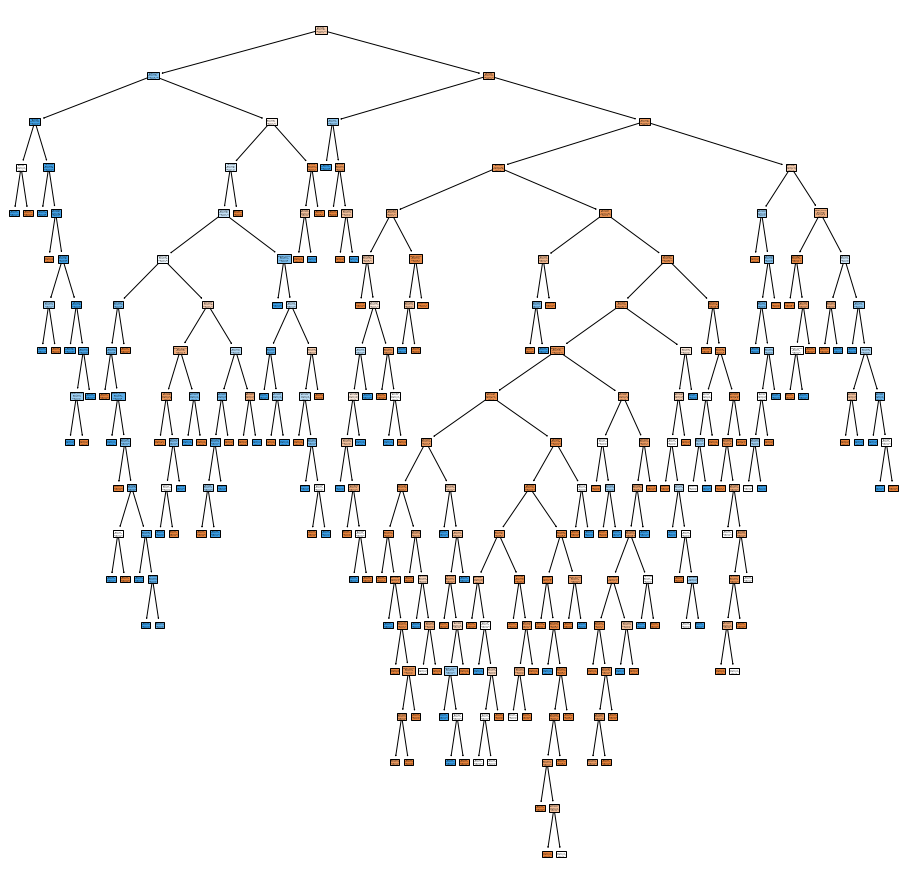

In [64]:
plt.figure(figsize=(16,16))
plot_tree(dt1,feature_names=fn,class_names=cn,filled=True)
plt.show()

### Model - 2-a
DecisionTree With Pruning and criterion='gini'

In [65]:
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=20)
dt2_res = model_metrics(dt2,x_train,x_test,y_train,y_test)

Training score 0.8731942215088283
Testing score 0.7873134328358209
Predictions
 [0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 1]
[[136  21]
 [ 36  75]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       157
           1       0.78      0.68      0.72       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [66]:
m2a = pd.DataFrame(dt2_res,index=['Decision Tree model With Pruning and criterion = gini'])
m2a

,Train_Score,Test_Score
Decision Tree model With Pruning and criterion = gini,0.873194,0.787313


In [67]:
# inference model useless

### Model - 2-b
DecisionTree With Pruning and criterion='entropy'

In [68]:
dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=20)
dt2_res = model_metrics(dt2,x_train,x_test,y_train,y_test)

Training score 0.8796147672552167
Testing score 0.7985074626865671
Predictions
 [0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]
[[140  17]
 [ 37  74]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.81      0.67      0.73       111

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.79       268



In [69]:
m2b = pd.DataFrame(dt2_res,index=['Decision Tree model With Pruning and criterion = entropy'])
m2b

,Train_Score,Test_Score
Decision Tree model With Pruning and criterion = entropy,0.879615,0.798507


### HyperParameter Tuning Using GridSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold

In [71]:
hparams_dt = {'criterion':['gini','entropy'],
             'max_depth':  list(range(5,20)),
             'min_samples_split':[8,10,12,14,15,17,20,22,24]}

In [72]:
bmodel = DecisionTreeClassifier()
kf = KFold(n_splits=5)
gs1 = GridSearchCV(estimator=bmodel,param_grid=hparams_dt,cv=kf, scoring='accuracy') 
gs1.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19],
                         'min_samples_split': [8, 10, 12, 14, 15, 17, 20, 22,
                                               24]},
             scoring='accuracy')

In [73]:
# hparams_dt = {'criterion':['gini','entropy'],
#              'max_depth' : list(range(5,20)),
#              'min_samples_Split': [8,9,16,17,18,24,25,29,30]}

In [74]:
print('Best Hyperparamters')
print(gs1.best_params_)
print(gs1.best_estimator_)

Best Hyperparamters
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 12}
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=12)


In [75]:
gs_based_model = DecisionTreeClassifier(**gs1.best_params_)
gs_based_res = model_metrics(gs_based_model,x_train,x_test,y_train,y_test)

Training score 0.8426966292134831
Testing score 0.8171641791044776
Predictions
 [0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]
[[143  14]
 [ 35  76]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       157
           1       0.84      0.68      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268



In [76]:
m2g = pd.DataFrame(gs_based_res,index=['Decision Tree model based on grid search cv'])
m2g

,Train_Score,Test_Score
Decision Tree model based on grid search cv,0.842697,0.817164


In [77]:
res = pd.concat([m1,m2,m2a,m2b,m2g])
res

,Train_Score,Test_Score
Logistic Regression model,0.804173,0.802239
Decision Tree model,0.977528,0.772388
Decision Tree model With Pruning and criterion = gini,0.873194,0.787313
Decision Tree model With Pruning and criterion = entropy,0.879615,0.798507
Decision Tree model based on grid search cv,0.842697,0.817164


# model 


In [82]:
adboost = AdaBoostClassifier(n_estimators=80)
ma = model_metrics(adboost,x_train,x_test,y_train,y_test)

Training score 0.8459069020866774
Testing score 0.8134328358208955
Predictions
 [0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]
[[137  20]
 [ 30  81]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [83]:
ma = pd.DataFrame(ma,index=['ADAboost'])
ma

,Train_Score,Test_Score
ADAboost,0.845907,0.813433


In [84]:
res = pd.concat([res,ma])
res

,Train_Score,Test_Score
Logistic Regression model,0.804173,0.802239
Decision Tree model,0.977528,0.772388
Decision Tree model With Pruning and criterion = gini,0.873194,0.787313
Decision Tree model With Pruning and criterion = entropy,0.879615,0.798507
Decision Tree model based on grid search cv,0.842697,0.817164
ADAboost,0.845907,0.813433


In [85]:
from xgboost import XGBClassifier

In [86]:
xgboost1 = XGBClassifier(objective='binary:logistic',eval_metric='logloss',
                  n_estimators=80,max_depth=4,reg_lambda=0.2,eta=0.3,
                  gamma=0.5, use_label_encoder=False,random_state=30)

mx = model_metrics(xgboost1,x_train,x_test,y_train,y_test)

Training score 0.9325842696629213
Testing score 0.8022388059701493
Predictions
 [0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 0]
[[135  22]
 [ 31  80]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       157
           1       0.78      0.72      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



C:\Users\Akshit Kaushik\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [87]:
mx = pd.DataFrame(mx,index=['XGBoost'])

In [88]:
res = pd.concat([res,mx])
res

,Train_Score,Test_Score
Logistic Regression model,0.804173,0.802239
Decision Tree model,0.977528,0.772388
Decision Tree model With Pruning and criterion = gini,0.873194,0.787313
Decision Tree model With Pruning and criterion = entropy,0.879615,0.798507
Decision Tree model based on grid search cv,0.842697,0.817164
ADAboost,0.845907,0.813433
XGBoost,0.932584,0.802239


In [ ]:
# based on all the observation of differnent model in the table res 
# top result are
# Logistic Regression model 	0.804173 	0.802239       80%
# Decision Tree model based on grid search cv 	0.842697 	0.817164     81%
# ADAboost 	0.845907 	0.813433     

In [ ]:
# rf_res = model_metrics(rf_base,x_train,x_test,y_train,y_test)

In [94]:
df_d.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1.0,0.0,7.2500,0,0,1
1,1,1,0,38.0,1.0,0.0,71.2833,1,0,0
2,1,3,0,26.0,0.0,0.0,7.9250,0,0,1
3,1,1,0,35.0,1.0,0.0,53.1000,0,0,1
4,0,3,1,35.0,0.0,0.0,8.0500,0,0,1


In [95]:
# df.head()

# test

In [261]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [228]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [229]:
df_test.drop('Cabin',axis =1 ,inplace = True)

In [230]:
# droping uniuqe variable
df_test.drop('Name',axis =1 ,inplace = True)

In [231]:

nvt = df_test.isnull().sum()
nvt= nvt[nvt>0]
nvt

Age     86
Fare     1
dtype: int64

In [232]:
df_test.drop('PassengerId',axis =1 ,inplace = True)

In [233]:
df_test.drop('Ticket',axis =1 ,inplace = True)

In [234]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [235]:
nvt = df_test.isnull().sum()
nvt= nvt[nvt>0]
nvt

Age     86
Fare     1
dtype: int64

In [236]:
# treating NUll Values
df_test['Age'].fillna(df_test['Age'].mode()[0],inplace = True)
# df_test['Embarked'].fillna(df_test['Embarked'].mode()[0],inplace = True)

In [237]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [238]:
df_test.duplicated().sum()

43

In [239]:
df_test.drop_duplicates()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
411,1,female,37.0,1,0,90.0000,Q
412,3,female,28.0,0,0,7.7750,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S


In [240]:
df_test['Sex'] = df_test['Sex'].replace({'male':1,'female':0})

In [241]:
df_test_d = pd.get_dummies(df_test,columns=['Embarked'])
df_test_d.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [242]:
df_test_d.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [219]:
df_test_d.dropna()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,21.0,0,0,8.0500,0,0,1
414,1,0,39.0,0,0,108.9000,1,0,0
415,3,1,38.5,0,0,7.2500,0,0,1
416,3,1,21.0,0,0,8.0500,0,0,1


In [245]:
a = df_test_d['Fare']

In [246]:
df_test_d['Fare'] = df_test_d['Fare'].fillna(df_test_d['Fare'].mean())


In [247]:
print(df_test_d['Fare'].dtypes)

float64


In [248]:
print(df_test_d['Fare'].mean())

35.6271884892086


In [249]:
nvt = df_test_d.isnull().sum()
nvt= nvt[nvt>0]
nvt

Series([], dtype: int64)

In [250]:
df_d.head() # train 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1.0,0.0,7.2500,0,0,1
1,1,1,0,38.0,1.0,0.0,71.2833,1,0,0
2,1,3,0,26.0,0.0,0.0,7.9250,0,0,1
3,1,1,0,35.0,1.0,0.0,53.1000,0,0,1
4,0,3,1,35.0,0.0,0.0,8.0500,0,0,1


In [251]:
df_test_d.head() # test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [255]:
ypred = lr.predict(df_test_d)
print(ypred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [256]:
df_test_d['Survived'] = ypred

In [258]:
df_test_d['Survived'] = df_test_d['Survived'].replace({0:'No',1:'Yes'})

In [259]:
df_test_d.head() #final

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1,34.5,0,0,7.8292,0,1,0,No
1,3,0,47.0,1,0,7.0000,0,0,1,No
2,2,1,62.0,0,0,9.6875,0,1,0,No
3,3,1,27.0,0,0,8.6625,0,0,1,No
4,3,0,22.0,1,1,12.2875,0,0,1,Yes


In [262]:
df_test_d['PassengerId'] = df_test['PassengerId']

In [263]:
df_test_d.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,PassengerId
0,3,1,34.5,0,0,7.8292,0,1,0,No,892
1,3,0,47.0,1,0,7.0000,0,0,1,No,893
2,2,1,62.0,0,0,9.6875,0,1,0,No,894
3,3,1,27.0,0,0,8.6625,0,0,1,No,895
4,3,0,22.0,1,1,12.2875,0,0,1,Yes,896


In [264]:
result   = df_test_d[['PassengerId','Survived']]

In [265]:
result.head()

,PassengerId,Survived
0,892,No
1,893,No
2,894,No
3,895,No
4,896,Yes


In [269]:
df_test_d.shape

(418, 11)

In [267]:
result.to_csv('Titanic_result.csv')

In [252]:
print(x_test.shape)
print(x_test.columns)
print(df_test_d.shape)
print(df_test_d.columns)

(268, 9)
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')
(418, 9)
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [253]:
x_test.dtypes

Pclass          int64
Sex             int64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [254]:
df_test_d.dtypes

Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [150]:
df_test_d['Fare']

0       7.8292
1          7.0
2       9.6875
3       8.6625
4      12.2875
        ...   
413       8.05
414      108.9
415       7.25
416       8.05
417    22.3583
Name: Fare, Length: 418, dtype: object